## [**Dataset**](https://www.kaggle.com/datasets/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones/data)

In [ ]:
# Import library
import gdown

# URL Google Drive file
url = 'https://drive.google.com/uc?id=1RcFusWVpZPOCKxka3C7nVylRSzYm3oYU'

# Output file name
output = 'amazon_reviews_unlocked_mobile.csv'

# Download the file
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1RcFusWVpZPOCKxka3C7nVylRSzYm3oYU
From (redirected): https://drive.google.com/uc?id=1RcFusWVpZPOCKxka3C7nVylRSzYm3oYU&confirm=t&uuid=54842625-c9d8-4503-9c84-e00badba64ef
To: /content/amazon_reviews_unlocked_mobile.csv
100%|██████████| 132M/132M [00:03<00:00, 35.2MB/s]


'amazon_reviews_unlocked_mobile.csv'

In [ ]:
import pandas as pd

df = pd.read_csv('amazon_reviews_unlocked_mobile.csv')
df.tail()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0
413839,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,4,Only downside is that apparently Verizon no lo...,0.0


In [ ]:
# Menambahkan kolom 'sentiment'
df['sentiment'] = df['Rating'].apply(lambda x: 'positive' if x > 3 else 'negative')

df.tail()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,sentiment
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0,positive
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0,negative
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0,positive
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0,negative
413839,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,4,Only downside is that apparently Verizon no lo...,0.0,positive


In [ ]:
# Mengecek missing values
print("Cek Missing Values:")
print(df.isnull().sum())  # Menghitung jumlah missing values per kolom

Cek Missing Values:
Product Name    0
Brand Name      0
Price           0
Rating          0
Reviews         0
Review Votes    0
sentiment       0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
df.shape

(334328, 4)

In [ ]:
df = df[['Product Name', 'Rating', 'Reviews', 'sentiment']]
df.tail()

,Product Name,Rating,Reviews,sentiment
413835,Samsung Convoy U640 Phone for Verizon Wireless...,5,another great deal great price,positive
413836,Samsung Convoy U640 Phone for Verizon Wireless...,3,Ok,negative
413837,Samsung Convoy U640 Phone for Verizon Wireless...,5,Passes every drop test onto porcelain tile!,positive
413838,Samsung Convoy U640 Phone for Verizon Wireless...,3,I returned it because it did not meet my needs...,negative
413839,Samsung Convoy U640 Phone for Verizon Wireless...,4,Only downside is that apparently Verizon no lo...,positive


In [ ]:
# Menghitung jumlah sentimen
sentiment_counts = df['sentiment'].value_counts()

# Menampilkan hasil
print("Jumlah Sentimen:")
print(sentiment_counts)

Jumlah Sentimen:
sentiment
positive    148250
negative     57297
Name: count, dtype: int64


Jumlah Sentimen:
sentiment
positive    230669
negative    103659
Name: count, dtype: int64


<ipython-input-14-b335ede60c59>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=palette)


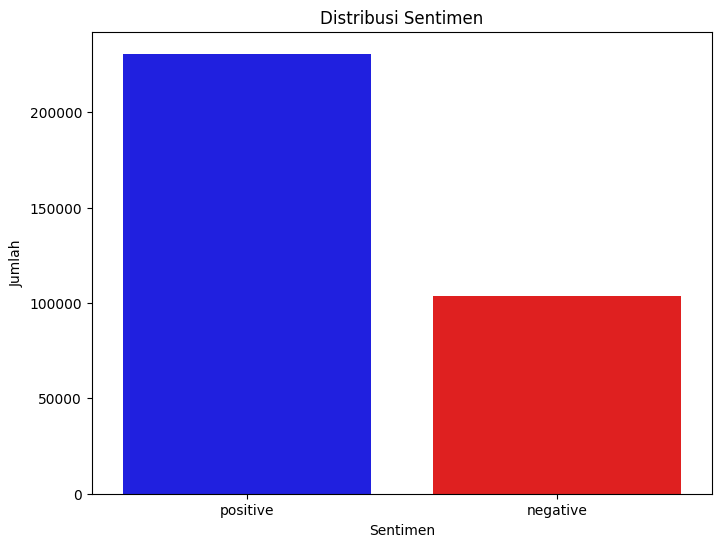

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah sentimen
sentiment_counts = df['sentiment'].value_counts()

# Menampilkan hasil
print("Jumlah Sentimen:")
print(sentiment_counts)

# Membuat palet warna khusus
palette = {
    'negative': 'red',
    'positive': 'blue'}

# Membuat visualisasi dengan Matplotlib dan Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=palette)
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
import plotly.express as px

# Menghitung jumlah sentimen
sentiment_counts = df['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'Count']

# Membuat visualisasi dengan Plotly
fig = px.bar(sentiment_counts, x='sentiment', y='Count', title='Distribusi Sentimen', color='sentiment')
fig.update_layout(xaxis_title='Sentimen', yaxis_title='Jumlah')
fig.show()

## **Preprocessing**

In [ ]:
# Mengubah semua nama kolom menjadi huruf kecil
df.columns = [col.lower() for col in df.columns]

print("Setelah perubahan:", df.columns)

Setelah perubahan: Index(['product name', 'rating', 'reviews', 'sentiment'], dtype='object')


### **Cleaning**

In [ ]:
import re

def clean_text(text):
    if isinstance(text, str):
        # Hapus URL
        text = re.sub(r'http\S+', '', text)
        # Hapus Mention
        text = re.sub(r'@[\w]+', '', text)
        # Hapus Hashtag
        text = re.sub(r'#\w+', '', text)
        # Hapus Angka
        text = re.sub(r'\d+', '', text)
        # Hapus Tanda Baca
        text = re.sub(r'[^\w\s]', '', text)
        # Hapus Enter dan gantikan dengan spasi
        text = re.sub(r'\n', ' ', text)
        # Hapus whitespace
        text = re.sub(r'\s+', ' ', text)
        # Hapus karakter non-ASCII
        text = re.sub(r'[^\x00-\x7F]+', '', text)
    return text

# Terapkan fungsi clean_text ke kolom 'reviews' DataFrame
df['review_clean'] = df['reviews'].apply(clean_text)
df.tail()

,product name,rating,reviews,sentiment,review_clean
413835,Samsung Convoy U640 Phone for Verizon Wireless...,5,another great deal great price,positive,another great deal great price
413836,Samsung Convoy U640 Phone for Verizon Wireless...,3,Ok,negative,Ok
413837,Samsung Convoy U640 Phone for Verizon Wireless...,5,Passes every drop test onto porcelain tile!,positive,Passes every drop test onto porcelain tile
413838,Samsung Convoy U640 Phone for Verizon Wireless...,3,I returned it because it did not meet my needs...,negative,I returned it because it did not meet my needs...
413839,Samsung Convoy U640 Phone for Verizon Wireless...,4,Only downside is that apparently Verizon no lo...,positive,Only downside is that apparently Verizon no lo...


### **Case Folding**

In [ ]:
# Fungsi untuk case folding (konversi ke huruf kecil)
def case_folding(text):
    if isinstance(text, str):
        text = text.lower()
    return text

# Terapkan fungsi case_folding ke kolom 'review_clean'
df['review_clean'] = df['review_clean'].apply(case_folding)
df.tail()

,product name,rating,reviews,sentiment,review_clean
413835,Samsung Convoy U640 Phone for Verizon Wireless...,5,another great deal great price,positive,another great deal great price
413836,Samsung Convoy U640 Phone for Verizon Wireless...,3,Ok,negative,ok
413837,Samsung Convoy U640 Phone for Verizon Wireless...,5,Passes every drop test onto porcelain tile!,positive,passes every drop test onto porcelain tile
413838,Samsung Convoy U640 Phone for Verizon Wireless...,3,I returned it because it did not meet my needs...,negative,i returned it because it did not meet my needs...
413839,Samsung Convoy U640 Phone for Verizon Wireless...,4,Only downside is that apparently Verizon no lo...,positive,only downside is that apparently verizon no lo...


In [ ]:
import nltk

# Download and prepare NLTK resources
nltk.download('punkt')        # Untuk tokenization
nltk.download('wordnet')      # Untuk lemmatization
nltk.download('punkt_tab')  # Download punkt_tab data for sentence tokenization
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Fungsi untuk lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    if isinstance(text, str):
        # Tokenisasi kalimat menjadi kata-kata
        words = word_tokenize(text)
        # Lemmatize setiap kata
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
        # Gabungkan kata-kata yang telah dilemmatize menjadi kalimat kembali
        text = ' '.join(lemmatized_words)
    return text

# Terapkan fungsi lemmatize_text ke kolom 'review_clean'
df['review_lemmatized'] = df['review_clean'].apply(lemmatize_text)

# Tampilkan hasil akhir
df.tail()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,product name,rating,reviews,sentiment,review_clean,review_lemmatized
413835,Samsung Convoy U640 Phone for Verizon Wireless...,5,another great deal great price,positive,another great deal great price,another great deal great price
413836,Samsung Convoy U640 Phone for Verizon Wireless...,3,Ok,negative,ok,ok
413837,Samsung Convoy U640 Phone for Verizon Wireless...,5,Passes every drop test onto porcelain tile!,positive,passes every drop test onto porcelain tile,pass every drop test onto porcelain tile
413838,Samsung Convoy U640 Phone for Verizon Wireless...,3,I returned it because it did not meet my needs...,negative,i returned it because it did not meet my needs...,i returned it because it did not meet my need ...
413839,Samsung Convoy U640 Phone for Verizon Wireless...,4,Only downside is that apparently Verizon no lo...,positive,only downside is that apparently verizon no lo...,only downside is that apparently verizon no lo...


In [ ]:
df_modelling=df[['review_lemmatized', 'sentiment']]
df_modelling.tail()

,review_lemmatized,sentiment
413835,another great deal great price,positive
413836,ok,negative
413837,pass every drop test onto porcelain tile,positive
413838,i returned it because it did not meet my need ...,negative
413839,only downside is that apparently verizon no lo...,positive


In [ ]:
df_modelling.to_csv('dataset_uap_clean.csv', index=False)

# Klasifikasi Deep Learning

## **Model 1**

### **Download pretrained GloVe**

In [ ]:
import os
import requests
import zipfile

# URL untuk mengunduh file GloVe
url = "http://nlp.stanford.edu/data/glove.6B.zip"
output_path = "glove.6B.zip"

# Download file with SSL verification disabled
response = requests.get(url, verify=False, stream=True)
if response.status_code == 200:
    with open(output_path, 'wb') as f:
        for chunk in response.iter_content(chunk_size=128):
            f.write(chunk)
    print("Download completed.")
else:
    print("Failed to download the file.")

# Mengekstrak file
extracted_path = "glove.6B.300d.txt"
if not os.path.exists(extracted_path):
    print("Mengekstrak file...")
    with zipfile.ZipFile(output_path, 'r') as zip_ref:
        zip_ref.extractall()
    print("Ekstraksi selesai.")

# Memastikan file glove.6B.300d.txt ada di direktori kerja
if os.path.exists(extracted_path):
    print("File GloVe 300D ditemukan.")
else:
    print("File GloVe 300D tidak ditemukan.")

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'nlp.stanford.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'downloads.cs.stanford.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Download completed.
Mengekstrak file...
Ekstraksi selesai.
File GloVe 300D ditemukan.


### **Library**

In [ ]:
!pip install tensorflow

In [ ]:
!pip install imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
df_lstm = pd.read_csv('dataset_uap_clean.csv')

In [ ]:
df_lstm.isnull().sum()

,0
review_lemmatized,446
sentiment,0


In [ ]:
df_lstm = df_lstm.dropna(subset=['review_lemmatized'])

In [ ]:
df_lstm.shape

(333882, 2)

In [ ]:
df_lstm = df_lstm.sample(frac=1).reset_index(drop=True)
df_lstm = df_lstm.iloc[:len(df_lstm)-300000]

print(f"New dataset size: {df_lstm.shape}")

New dataset size: (33882, 2)


In [ ]:
length_of_the_messages = df_lstm['review_lemmatized'].str.split("\\s+")
print("Max number of words = ", length_of_the_messages.str.len().max())
print("Index = ", length_of_the_messages.str.len().idxmax())

Max number of words =  4921
Index =  7495


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_lstm['review_lemmatized'])
sequences = tokenizer.texts_to_sequences(df_lstm['review_lemmatized'])

In [ ]:
max_length = 3000
data = pad_sequences(sequences, maxlen=max_length)

In [ ]:
# Label encoding
sentiment_labels = {'negative': 0, 'positive': 1}
df_lstm['sentiment'] = df_lstm['sentiment'].map(sentiment_labels)
labels = df_lstm['sentiment'].values

In [ ]:
# Split data menjadi train (80%) dan temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

# Split temp menjadi validasi (50% dari 20% = 10% dari total data) dan test (50% dari 20% = 10% dari total data)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Cek ukuran set data
print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data validasi: {X_valid.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")

Jumlah data training: 27105
Jumlah data validasi: 3388
Jumlah data testing: 3389


In [ ]:
smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print(f"Jumlah data training setelah balancing: {X_train_balanced.shape[0]}")

Jumlah data training setelah balancing: 37360


In [ ]:
# Menampilkan jumlah data sebelum balancing
print(f'Jumlah data sebelum SMOTE:\nPositive: {sum(y_train==1)}, Negative: {sum(y_train==0)}')

# Menampilkan jumlah data setelah SMOTE
print(f'Jumlah data setelah SMOTE:\nPositive: {sum(y_train_balanced==1)}, Negative: {sum(y_train_balanced==0)}')

Jumlah data sebelum SMOTE:
Positive: 18680, Negative: 8425
Jumlah data setelah SMOTE:
Positive: 18680, Negative: 18680


In [ ]:
# Memuat pre-trained embeddings (GloVe)
embedding_dim = 300
embeddings_index = {}
with open('glove.6B.300d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [ ]:
# Membuat embedding matrix
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

### LSTM

In [ ]:
model = Sequential()
model.add(Embedding(len(word_index) + 1, embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=True))
model.add(Dropout(0.5))  # Dropout neuron untuk mengurangi overfitting
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))  # Mengubah lapisan terakhir menjadi 1 neuron dengan aktivasi sigmoid

# Mengatur learning rate
optimizer = Adam(learning_rate=0.0001)

# Kompilasi model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=256, validation_data=(X_valid, y_valid))

Epoch 1/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 67s 577ms/step - accuracy: 0.6802 - loss: 0.6069 - val_accuracy: 0.7627 - val_loss: 0.4648
Epoch 2/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 61s 573ms/step - accuracy: 0.7928 - loss: 0.4350 - val_accuracy: 0.8486 - val_loss: 0.3565
Epoch 3/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 83s 585ms/step - accuracy: 0.8344 - loss: 0.3762 - val_accuracy: 0.8577 - val_loss: 0.3444
Epoch 4/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 85s 617ms/step - accuracy: 0.8503 - loss: 0.3446 - val_accuracy: 0.8598 - val_loss: 0.3427
Epoch 5/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 80s 594ms/step - accuracy: 0.8630 - loss: 0.3248 - val_accuracy: 0.8751 - val_loss: 0.2951
Epoch 6/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 81s 585ms/step - accuracy: 0.8711 - loss: 0.3087 - val_accuracy: 0.8772 - val_loss: 0.2935
Epoch 7/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 82s 588ms/step - accuracy: 0.8718 - loss: 0.3025 - val_accuracy: 0.8784 - val_loss: 0.2936
Epoch 8/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 82s 587ms/step - accuracy: 0.8771 - loss: 0

In [ ]:
model.save('lstm_uap_retrain.h5')

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['0', '1'])

print(f"Test Accuracy: {accuracy*100:.2f}%")
print(report)

106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step
Test Accuracy: 89.76%
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1054
           1       0.91      0.94      0.93      2335

    accuracy                           0.90      3389
   macro avg       0.89      0.87      0.88      3389
weighted avg       0.90      0.90      0.90      3389



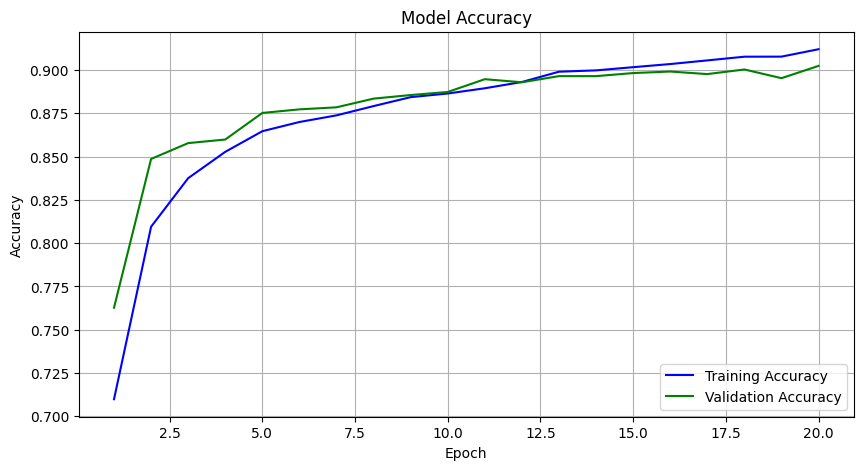

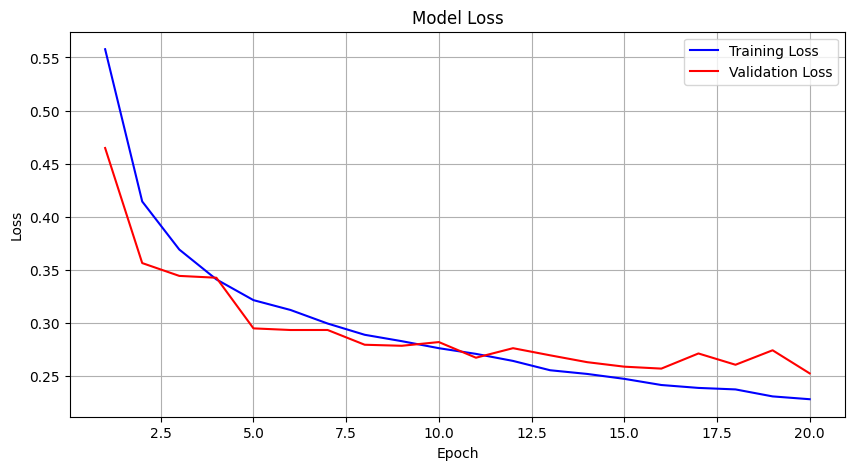

In [ ]:
# Data dari history training
epochs = range(1, len(history.history['accuracy']) + 1)
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot untuk Akurasi
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'g', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot untuk Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step


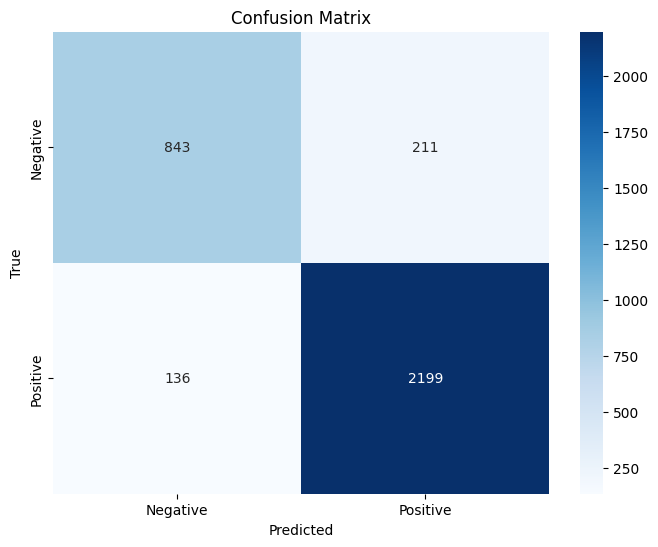

In [ ]:
# Predict the sentiment for test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Identifying misclassified samples
misclassified_indices = np.where(y_test != y_pred.reshape(-1))[0]
misclassified_texts = df_lstm.iloc[misclassified_indices]['review_lemmatized']
misclassified_true_labels = y_test[misclassified_indices]
misclassified_pred_labels = y_pred[misclassified_indices]

print("\nMisclassified Samples:")
for i in range(len(misclassified_indices)):
    print(f"Text: {misclassified_texts.iloc[i]}")
    print(f"True Label: {misclassified_true_labels[i]}")
    print(f"Predicted Label: {misclassified_pred_labels[i]}")
    print()

# Identifying correctly classified samples
correct_indices = np.where(y_test == y_pred.reshape(-1))[0]
correct_texts = df_lstm.iloc[correct_indices]['review_lemmatized']
correct_true_labels = y_test[correct_indices]

# Filter correctly predicted Positive samples
positive_correct_indices = correct_indices[correct_true_labels == 1]
print("Correctly Classified Positive Samples (5 examples):")
for i in range(min(5, len(positive_correct_indices))):
    index = positive_correct_indices[i]
    print(f"Text: {correct_texts.iloc[index]}")
    print(f"True Label: {correct_true_labels[index]}")
    print(f"Predicted Label: {y_pred[index]}")
    print()

# Filter correctly predicted Negative samples
negative_correct_indices = correct_indices[correct_true_labels == 0]
print("Correctly Classified Negative Samples (5 examples):")
for i in range(min(5, len(negative_correct_indices))):
    index = negative_correct_indices[i]
    print(f"Text: {correct_texts.iloc[index]}")
    print(f"True Label: {correct_true_labels[index]}")
    print(f"Predicted Label: {y_pred[index]}")
    print()


Misclassified Samples:
Text: my husband who is not technological had finally found a phone that he felt comfortable operating a month ago he accidentally dropped his original lg vx phone and broke the screen he get completely frustrated with a smart phone so looking for another replacement phone became my mission i searched amazon and thank goodness you came through again i had first purchased a reconditioned lg vx chocolate for verizon wireless but when it arrived and we tried to set it up there wa a problem with the internal speaker and he wa unable to receive or make any phone call so that phone had to be returned then i found this light blue phone marked a new and ordered it it wa wonderful it worked and now he is a happy camper with another lg vx chocolate verizon phone thanks again amazon you saved me
True Label: 1
Predicted Label: [0]

Text: i am happy with this phone at st i had a little problem but i contacted the company and they took care of it and even gave me a partial re

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import pickle

# Simpan tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


### **Web Deploy**

In [ ]:
import gradio as gr
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import re

# Load model LSTM
model = tf.keras.models.load_model('lstm_uap_retrain.h5')

# Load tokenizer yang telah disimpan
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Set maximum sequence length sesuai training
max_length = 500  # Ubah panjang ini sesuai max length dari training

# Sentiment label mapping
sentiment_labels = {0: 'Negative', 1: 'Positive'}

# Fungsi untuk preprocessing teks (sama seperti saat training)
def clean_text(text):
    # Hapus URL
    text = re.sub(r'http\S+', '', text)
    # Hapus Mention
    text = re.sub(r'@[\w]+', '', text)
    # Hapus Hashtag
    text = re.sub(r'#\w+', '', text)
    # Hapus Angka
    text = re.sub(r'\d+', '', text)
    # Hapus Tanda Baca
    text = re.sub(r'[^\w\s]', '', text)
    # Hapus Enter dan gantikan dengan spasi
    text = re.sub(r'\n', ' ', text)
    # Hapus whitespace
    text = re.sub(r'\s+', ' ', text)
    # Hapus karakter non-ASCII
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    return text

def predict_sentiment(review_text):
    # Preprocessing teks
    cleaned_text = clean_text(review_text)
    print("Cleaned Text:", cleaned_text)  # Debug

    # Tokenisasi dan padding
    sequences = tokenizer.texts_to_sequences([cleaned_text])
    padded_sequences = pad_sequences(sequences, maxlen=max_length)
    print("Padded Sequences:", padded_sequences)  # Debug

    # Prediksi sentimen
    prediction = model.predict(padded_sequences)
    print(f"Raw Model Output: {prediction}")  # Debugging raw output

    # Untuk binary classification dengan threshold yang lebih jelas
    if prediction[0][0] >= 0.5:  # Jika probabilitas kelas positif lebih dari 0.5
        sentiment = 1  # Sentimen positif
        confidence = float(prediction[0][0])  # Confidence untuk positif
    else:
        sentiment = 0  # Sentimen negatif
        confidence = 1 - float(prediction[0][0])  # Confidence untuk negatif


    # Return hasil prediksi
    return f"Sentiment: {sentiment_labels[sentiment]} (Confidence: {confidence:.2f})"

# Gradio Interface
iface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(label="Enter Review Text", placeholder="Type your review here..."),
    outputs=gr.Textbox(label="Predicted Sentiment"),
    title="Sentiment Analysis Using LSTM",
    description="Enter a product review (smartphones, gadgets, etc.) to predict whether it is Positive or Negative."
)

# Launch Gradio App
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c54d37e50d1f9ae4b2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## **Model 2**

### **Download pretrained GloVe**

In [4]:
import os
import requests
import zipfile

# URL untuk mengunduh file GloVe
url = "http://nlp.stanford.edu/data/glove.6B.zip"
output_path = "glove.6B.zip"

# Download file with SSL verification disabled
response = requests.get(url, verify=False, stream=True)
if response.status_code == 200:
    with open(output_path, 'wb') as f:
        for chunk in response.iter_content(chunk_size=128):
            f.write(chunk)
    print("Download completed.")
else:
    print("Failed to download the file.")

# Mengekstrak file
extracted_path = "glove.6B.300d.txt"
if not os.path.exists(extracted_path):
    print("Mengekstrak file...")
    with zipfile.ZipFile(output_path, 'r') as zip_ref:
        zip_ref.extractall()
    print("Ekstraksi selesai.")

# Memastikan file glove.6B.300d.txt ada di direktori kerja
if os.path.exists(extracted_path):
    print("File GloVe 300D ditemukan.")
else:
    print("File GloVe 300D tidak ditemukan.")

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'nlp.stanford.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'downloads.cs.stanford.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Download completed.
Mengekstrak file...
Ekstraksi selesai.
File GloVe 300D ditemukan.


In [1]:
!pip install tensorflow

In [2]:
!pip install imbalanced-learn

In [17]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [5]:
df_lstm = pd.read_csv('dataset_uap_clean.csv')

In [6]:
df_lstm.isnull().sum()

,0
review_lemmatized,446
sentiment,0


In [7]:
df_lstm = df_lstm.dropna(subset=['review_lemmatized'])

In [8]:
df_lstm.shape

(333882, 2)

In [9]:
df_lstm = df_lstm.sample(frac=1).reset_index(drop=True)
df_lstm = df_lstm.iloc[:len(df_lstm)-300000]

print(f"New dataset size: {df_lstm.shape}")

New dataset size: (33882, 2)


In [10]:
length_of_the_messages = df_lstm['review_lemmatized'].str.split("\\s+")
print("Max number of words = ", length_of_the_messages.str.len().max())
print("Index = ", length_of_the_messages.str.len().idxmax())

Max number of words =  2943
Index =  32079


In [11]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_lstm['review_lemmatized'])
sequences = tokenizer.texts_to_sequences(df_lstm['review_lemmatized'])

In [12]:
max_length = 3000
data = pad_sequences(sequences, maxlen=max_length)

In [13]:
# Label encoding
sentiment_labels = {'negative': 0, 'positive': 1}
df_lstm['sentiment'] = df_lstm['sentiment'].map(sentiment_labels)
labels = df_lstm['sentiment'].values

In [14]:
# Split data menjadi train (80%) dan temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

# Split temp menjadi validasi (50% dari 20% = 10% dari total data) dan test (50% dari 20% = 10% dari total data)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Cek ukuran set data
print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data validasi: {X_valid.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")

Jumlah data training: 27105
Jumlah data validasi: 3388
Jumlah data testing: 3389


In [15]:
smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print(f"Jumlah data training setelah balancing: {X_train_balanced.shape[0]}")

Jumlah data training setelah balancing: 37290


In [16]:
# Menampilkan jumlah data sebelum balancing
print(f'Jumlah data sebelum SMOTE:\nPositive: {sum(y_train==1)}, Negative: {sum(y_train==0)}')

# Menampilkan jumlah data setelah SMOTE
print(f'Jumlah data setelah SMOTE:\nPositive: {sum(y_train_balanced==1)}, Negative: {sum(y_train_balanced==0)}')

Jumlah data sebelum SMOTE:
Positive: 18645, Negative: 8460
Jumlah data setelah SMOTE:
Positive: 18645, Negative: 18645


In [18]:
# Memuat pre-trained embeddings (GloVe)
embedding_dim = 300
embeddings_index = {}
with open('glove.6B.300d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [19]:
# Membuat embedding matrix
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [20]:
model = Sequential()
model.add(Embedding(len(word_index) + 1, embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=True))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))  # Tambahkan lapisan konvolusi 1D
model.add(GlobalMaxPooling1D())  # Pooling untuk mengurangi dimensi fitur
model.add(Dropout(0.5))  # Dropout neuron untuk mengurangi overfitting
model.add(Dense(128, activation='relu'))  # Lapisan fully connected
model.add(Dense(1, activation='sigmoid'))  # Lapisan keluaran untuk klasifikasi biner

# Mengatur learning rate
optimizer = Adam(learning_rate=0.0001)

# Kompilasi model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [21]:
history = model.fit(X_train_balanced, y_train_balanced, epochs=20, batch_size=256, validation_data=(X_valid, y_valid))

Epoch 1/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 77s 459ms/step - accuracy: 0.6218 - loss: 0.6656 - val_accuracy: 0.6747 - val_loss: 0.5885
Epoch 2/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 57s 388ms/step - accuracy: 0.7393 - loss: 0.5265 - val_accuracy: 0.7621 - val_loss: 0.4715
Epoch 3/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 81s 384ms/step - accuracy: 0.8003 - loss: 0.4489 - val_accuracy: 0.8149 - val_loss: 0.3992
Epoch 4/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 82s 383ms/step - accuracy: 0.8330 - loss: 0.3922 - val_accuracy: 0.8303 - val_loss: 0.3726
Epoch 5/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 83s 388ms/step - accuracy: 0.8536 - loss: 0.3573 - val_accuracy: 0.8483 - val_loss: 0.3431
Epoch 6/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 81s 382ms/step - accuracy: 0.8703 - loss: 0.3255 - val_accuracy: 0.8616 - val_loss: 0.3255
Epoch 7/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 56s 381ms/step - accuracy: 0.8762 - loss: 0.3075 - val_accuracy: 0.8660 - val_loss: 0.3185
Epoch 8/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 56s 385ms/step - accuracy: 0.8896 - loss: 0

In [22]:
model.save('cnn_uap_retrain.h5')

In [23]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])

print(f"Test Accuracy: {accuracy*100:.2f}%")
print(report)

106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
Test Accuracy: 89.67%
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1058
           1       0.93      0.92      0.92      2331

    accuracy                           0.90      3389
   macro avg       0.88      0.89      0.88      3389
weighted avg       0.90      0.90      0.90      3389



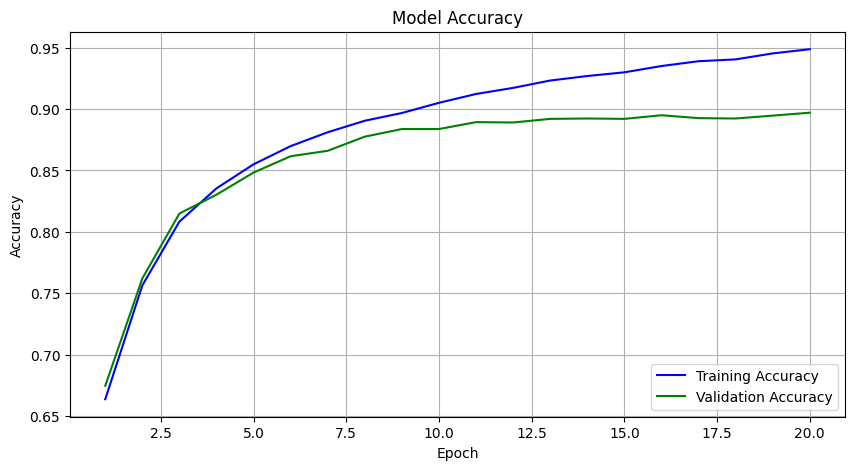

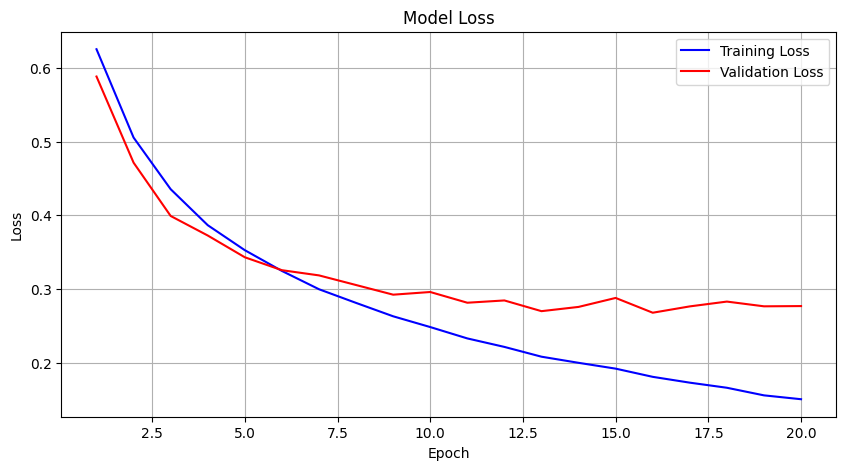

In [24]:
# Visualisasi hasil training (akurasi dan loss)
epochs = range(1, len(history.history['accuracy']) + 1)
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot untuk Akurasi
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'g', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot untuk Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


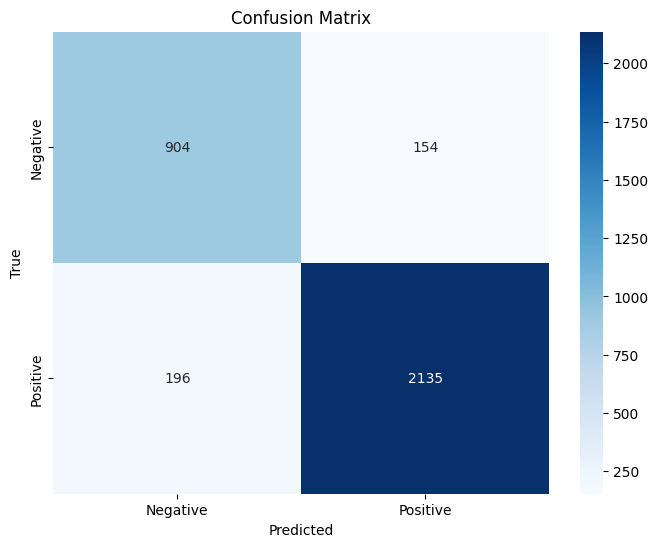

In [25]:
# Predict the sentiment for test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Identifying misclassified samples
misclassified_indices = np.where(y_test != y_pred.reshape(-1))[0]
misclassified_texts = df_lstm.iloc[misclassified_indices]['review_lemmatized']
misclassified_true_labels = y_test[misclassified_indices]
misclassified_pred_labels = y_pred[misclassified_indices]

print("\nMisclassified Samples:")
for i in range(len(misclassified_indices)):
    print(f"Text: {misclassified_texts.iloc[i]}")
    print(f"True Label: {misclassified_true_labels[i]}")
    print(f"Predicted Label: {misclassified_pred_labels[i]}")
    print()

# Identifying correctly classified samples
correct_indices = np.where(y_test == y_pred.reshape(-1))[0]
correct_texts = df_lstm.iloc[correct_indices]['review_lemmatized']
correct_true_labels = y_test[correct_indices]


Misclassified Samples:
Text: very good fast and clear thanks
True Label: 1
Predicted Label: [0]

Text: estoy totalmente satisfecho con wireovia han cumplido con el tiempo estipulado el cell llego en perfecta condicin y funciona muy bien en venezuela y ademas wireovia no entrega un pequeo regalo
True Label: 0
Predicted Label: [1]

Text: purchased this phone for my wife a a replacement to a broken htc x she really like this phone better than the htc setup wa simple took the att sim from her broken htc and put it in the lumen turned it on and followed the setup prompt on the screen she wa up and running in about minute
True Label: 0
Predicted Label: [1]

Text: it work fine no issue so far good purchase
True Label: 1
Predicted Label: [0]

Text: clip is too big for my otter box
True Label: 1
Predicted Label: [0]

Text: nice and relatively cheap same screen size a iphone s
True Label: 1
Predicted Label: [0]

Text: great phone no complaint
True Label: 0
Predicted Label: [1]

Text: good
True 

In [27]:
# Filter correctly predicted Positive samples
positive_correct_indices = correct_indices[correct_true_labels == 1]
print("Correctly Classified Positive Samples (10 examples):")
for i in range(min(10, len(positive_correct_indices))):
    index = positive_correct_indices[i]
    print(f"Text: {correct_texts.iloc[index]}")
    print(f"True Label: {correct_true_labels[index]}")
    print(f"Predicted Label: {y_pred[index]}")
    print()

# Filter correctly predicted Negative samples
negative_correct_indices = correct_indices[correct_true_labels == 0]
print("Correctly Classified Negative Samples (10 examples):")
for i in range(min(10, len(negative_correct_indices))):
    index = negative_correct_indices[i]
    print(f"Text: {correct_texts.iloc[index]}")
    print(f"True Label: {correct_true_labels[index]}")
    print(f"Predicted Label: {y_pred[index]}")
    print()

Correctly Classified Positive Samples (10 examples):
Text: excelent
True Label: 1
Predicted Label: [1]

Text: told me the phone is unlocked by email but can not use it oversea i checked it it is locked it is not be trusted
True Label: 1
Predicted Label: [1]

Text: delivery wa great but the phone didnt make it to the new year completely blacked out screen with no previous damage done bout to head to dinner and no screen no way to call out text nothing owned the phone apx month
True Label: 1
Predicted Label: [1]

Text: the phone doe not work well sometimes usable sometime not
True Label: 1
Predicted Label: [1]

Text: excelente
True Label: 1
Predicted Label: [1]

Text: i bought this phone for my dad and he is in love with it it ha fastcharging and all the high end spec that you could ask for in a top tier device i dont know much about it besides the fact that there hasnt been any issue thus far it got some interesting feature and is a pleasure to use i can tell you that much
True Label: 1

In [29]:
import pickle

# Simpan tokenizer
with open('tokenizer_cnn.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [2]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


### **Web Deploy**

In [4]:
import gradio as gr
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import re

# Load model cnn
model = tf.keras.models.load_model('cnn_uap_retrain.h5')

# Load tokenizer yang telah disimpan
with open('tokenizer_cnn.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Set maximum sequence length sesuai training
max_length = 500  # Ubah panjang ini sesuai max length dari training

# Sentiment label mapping
sentiment_labels = {0: 'Negative', 1: 'Positive'}

# Fungsi untuk preprocessing teks (sama seperti saat training)
def clean_text(text):
    # Hapus URL
    text = re.sub(r'http\S+', '', text)
    # Hapus Mention
    text = re.sub(r'@[\w]+', '', text)
    # Hapus Hashtag
    text = re.sub(r'#\w+', '', text)
    # Hapus Angka
    text = re.sub(r'\d+', '', text)
    # Hapus Tanda Baca
    text = re.sub(r'[^\w\s]', '', text)
    # Hapus Enter dan gantikan dengan spasi
    text = re.sub(r'\n', ' ', text)
    # Hapus whitespace
    text = re.sub(r'\s+', ' ', text)
    # Hapus karakter non-ASCII
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    return text

def predict_sentiment(review_text):
    # Preprocessing teks
    cleaned_text = clean_text(review_text)
    print("Cleaned Text:", cleaned_text)  # Debug

    # Tokenisasi dan padding
    sequences = tokenizer.texts_to_sequences([cleaned_text])
    padded_sequences = pad_sequences(sequences, maxlen=max_length)
    print("Padded Sequences:", padded_sequences)  # Debug

    # Prediksi sentimen
    prediction = model.predict(padded_sequences)
    print(f"Raw Model Output: {prediction}")  # Debugging raw output

    # Untuk binary classification dengan threshold yang lebih jelas
    if prediction[0][0] >= 0.5:  # Jika probabilitas kelas positif lebih dari 0.5
        sentiment = 1  # Sentimen positif
        confidence = float(prediction[0][0])  # Confidence untuk positif
    else:
        sentiment = 0  # Sentimen negatif
        confidence = 1 - float(prediction[0][0])  # Confidence untuk negatif


    # Return hasil prediksi
    return f"Sentiment: {sentiment_labels[sentiment]} (Confidence: {confidence:.2f})"

# Gradio Interface
iface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(label="Enter Review Text", placeholder="Type your review here..."),
    outputs=gr.Textbox(label="Predicted Sentiment"),
    title="Sentiment Analysis Using cnn",
    description="Enter a product review (smartphones, gadgets, etc.) to predict whether it is Positive or Negative."
)

# Launch Gradio App
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://623bb7efbcf52cc5ca.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
